# Proyecto 1 - Obtención y Limpieza de Datos

In [39]:
%matplotlib inline

In [40]:
import warnings as wr  # Avoid warnings
wr.filterwarnings('ignore')

In [55]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
MAIN_SOURCE = './archive/processed/combined_output.csv'
df = pd.read_csv(MAIN_SOURCE)

## Quick data exploration

In [43]:
df.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,16-01-0138-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO COBAN,KM.2 SALIDA A SAN JUAN CHAMELCO ZONA 8,77945104,MERCEDES JOSEFINA TORRES GALVEZ,GUSTAVO ADOLFO SIERRA POP,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO VERAPAZ,KM 209.5 ENTRADA A LA CIUDAD,77367402,MERCEDES JOSEFINA TORRES GALVEZ,GILMA DOLORES GUAY PAZ DE LEAL,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
2,16-01-0140-46,16-031,ALTA VERAPAZ,COBAN,"COLEGIO ""LA INMACULADA""",7A. AVENIDA 11-109 ZONA 6,78232301,MERCEDES JOSEFINA TORRES GALVEZ,VIRGINIA SOLANO SERRANO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
3,16-01-0141-46,16-005,ALTA VERAPAZ,COBAN,ESCUELA NACIONAL DE CIENCIAS COMERCIALES,2A CALLE 11-10 ZONA 2,79514215,RUDY ADOLFO TOT OCH,HÉCTOR ROLANDO CHUN POOU,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
4,16-01-0142-46,16-005,ALTA VERAPAZ,COBAN,INSTITUTO NORMAL MIXTO DEL NORTE 'EMILIO ROSAL...,3A AVE 6-23 ZONA 11,79521468,RUDY ADOLFO TOT OCH,VICTOR HUGO DOMÍNGUEZ REYES,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,BILINGUE,VESPERTINA,DIARIO(REGULAR),ALTA VERAPAZ


In [44]:
df.shape

(9356, 17)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9356 entries, 0 to 9355
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODIGO           9333 non-null   object
 1   DISTRITO         9125 non-null   object
 2   DEPARTAMENTO     9333 non-null   object
 3   MUNICIPIO        9333 non-null   object
 4   ESTABLECIMIENTO  9333 non-null   object
 5   DIRECCION        9282 non-null   object
 6   TELEFONO         8795 non-null   object
 7   SUPERVISOR       9124 non-null   object
 8   DIRECTOR         8436 non-null   object
 9   NIVEL            9333 non-null   object
 10  SECTOR           9333 non-null   object
 11  AREA             9333 non-null   object
 12  STATUS           9333 non-null   object
 13  MODALIDAD        9333 non-null   object
 14  JORNADA          9333 non-null   object
 15  PLAN             9333 non-null   object
 16  DEPARTAMENTAL    9333 non-null   object
dtypes: object(17)
memory usage: 1.2+ 

In [46]:
# ✅ Commented to avoid time consuming process, uncomment to generate the report
# profile = ProfileReport(df, title='Cervical Cancer', explorative=True)
# profile.to_file('./archive/report.html')
# profile.to_notebook_iframe()

💡 Check for repeated rows ids...

In [47]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate the percentage of null values
null_percentage = df.isnull().mean() * 100

# Calculate the percentage of unique values
unique_percentage = df.nunique() / len(df) * 100

# Get data types
data_types = df.dtypes

# Combine all information into a DataFrame for a neat summary
summary_df = pd.DataFrame({
    'Null Values (%)': null_percentage,
    'Unique Values (%)': unique_percentage,
    'Data Type': data_types
})

summary_df

,Null Values (%),Unique Values (%),Data Type
CODIGO,0.245832,99.754168,object
DISTRITO,2.469004,7.374947,object
DEPARTAMENTO,0.245832,0.245832,object
MUNICIPIO,0.245832,3.730227,object
ESTABLECIMIENTO,0.245832,60.057717,object
DIRECCION,0.790936,65.049166,object
TELEFONO,5.996152,58.251389,object
SUPERVISOR,2.479692,7.043608,object
DIRECTOR,9.833262,50.406156,object
NIVEL,0.245832,0.010688,object


## Initial Cleaning

Find duplicate values in 'CODIGO' (keeping the first occurrence as not duplicated)

In [48]:
df[df.duplicated('CODIGO', keep=False)]

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We found that the repeated values comes from the NaN values

In [49]:
duplicated_rows = df[df.duplicated('CODIGO', keep=False)]

In [50]:
# Remove the rows where CODIGO is NaN
df = df.dropna(subset=['CODIGO'])

In [51]:
len(df[df.duplicated('CODIGO', keep=False)])

0

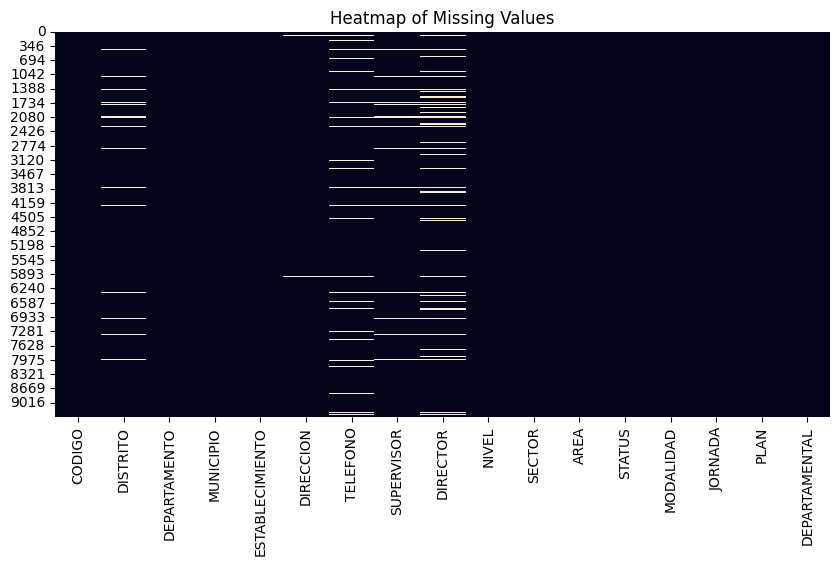

In [56]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")  # Adding a title
plt.show()

In [57]:
# Get some rows that has null values


In [59]:
# Assuming df is your DataFrame
rows_with_nulls = df[df.isnull().any(axis=1)]

# Display the first few rows with null values
rows_with_nulls.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
8,16-01-0150-46,16-006,ALTA VERAPAZ,COBAN,INSTITUTO INTERCULTRUAL ALTAVERAPACENCESE -IIAV-,3A. AVAENIDA 1-23 ZONA 4,NaN,EFRAIN CAAL CUC,GUILLERMO ESTUARDO VASQUEZ MORALES,DIVERSIFICADO,PRIVADO,URBANA,CERRADA TEMPORALMENTE,BILINGUE,DOBLE,FIN DE SEMANA,ALTA VERAPAZ
68,16-01-1172-46,16-006,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO CARLOS V,6A. CALLE 2-06 ZONA 8 PERIFERICO SUR COBAN,NaN,EFRAIN CAAL CUC,NaN,DIVERSIFICADO,PRIVADO,URBANA,CERRADA TEMPORALMENTE,MONOLINGUE,MATUTINA,FIN DE SEMANA,ALTA VERAPAZ
69,16-01-1173-46,16-006,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO CARLOS V,6A. CALLE 2-06 ZONA 8 PERIFERICO SUR COBAN,NaN,EFRAIN CAAL CUC,--,DIVERSIFICADO,PRIVADO,URBANA,CERRADA TEMPORALMENTE,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
73,16-01-1177-46,16-006,ALTA VERAPAZ,COBAN,INSTITUTO PRIVADO MIXTO SANTO DOMINGO,2A. CALLE 11-10 ZONA 2,77231494,EFRAIN CAAL CUC,NaN,DIVERSIFICADO,PRIVADO,URBANA,CERRADA TEMPORALMENTE,MONOLINGUE,MATUTINA,SABATINO,ALTA VERAPAZ
74,16-01-1259-46,16-006,ALTA VERAPAZ,COBAN,INSTITUTO DE TURISMO Y AVIACION DEL NORTE ITAN,3A. AVENIDA 5-28 ZONA 4,58633599,EFRAIN CAAL CUC,NaN,DIVERSIFICADO,PRIVADO,URBANA,CERRADA TEMPORALMENTE,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ


Replace 'XX-' values in DISTRITO with 'XX-000'

In [37]:
df['DISTRITO'] = df['DISTRITO'].apply(lambda x: str(x) + '000' if str(x).endswith('-') else x)

Remove punctuation and accents from ESTABLECIMIENTO

In [46]:
import re
import unicodedata

def normalize_school_names(name):
    # Convert to uppercase
    name = name.upper()
    # Normalize unicode characters to their base form and remove accents
    name = ''.join(
        c for c in unicodedata.normalize('NFD', name) 
        if unicodedata.category(c) != 'Mn'
    )
    # Remove punctuation
    name = re.sub(r'[^\w\s]', '', name)
    # Remove extra spaces
    name = re.sub(r'\s+', ' ', name).strip()
    return name

In [47]:
df['ESTABLECIMIENTO'] = df['ESTABLECIMIENTO'].apply(normalize_school_names)